In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,models,layers

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

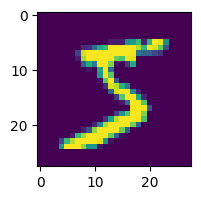

In [5]:
plt.figure(figsize=(6,2))
plt.imshow(x_train[0])

In [17]:
x_train.shape

(60000, 28, 28)

In [28]:
y_train.shape

(60000,)

In [8]:
#normalizing the datset

In [9]:
x_train=x_train/255
x_test=x_test/255

In [30]:
x_train=x_train.reshape(-1, 28, 28,1)

In [34]:
cnn=models.Sequential([
    #convolution layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense layers
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1830 - accuracy: 0.9434
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0564 - accuracy: 0.9829
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0409 - accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0313 - accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0253 - accuracy: 0.9922


In [36]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 4ms/step - loss: 0.0292 - accuracy: 0.9905


[0.029205212369561195, 0.9904999732971191]

In [38]:
y_pred=cnn.predict(x_test)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[8.45671866e-11, 1.52589621e-07, 2.09539917e-06, ...,
        9.99997139e-01, 6.92888316e-11, 2.04555448e-07],
       [6.42584652e-08, 1.65295582e-08, 9.99999881e-01, ...,
        6.90112911e-10, 6.65533115e-11, 1.25139374e-12],
       [7.98352602e-08, 9.99987841e-01, 1.91544970e-07, ...,
        4.47499637e-08, 2.22088556e-06, 1.13137915e-07],
       ...,
       [1.25851640e-13, 9.59204183e-09, 1.85217142e-09, ...,
        1.77733792e-08, 5.30130206e-09, 1.89751631e-07],
       [2.88302582e-09, 8.35576763e-09, 5.68789321e-11, ...,
        1.02894982e-12, 2.59081717e-04, 2.15788676e-09],
       [2.83215286e-07, 1.75141484e-08, 4.47491963e-08, ...,
        5.85795721e-14, 7.38658343e-08, 7.75578890e-09]], dtype=float32)

In [39]:
y_class=[np.argmax(i) for i in y_pred]
y_class[:5]

[7, 2, 1, 0, 4]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print("classification metrics \n",classification_report(y_test,y_class))

classification metrics 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



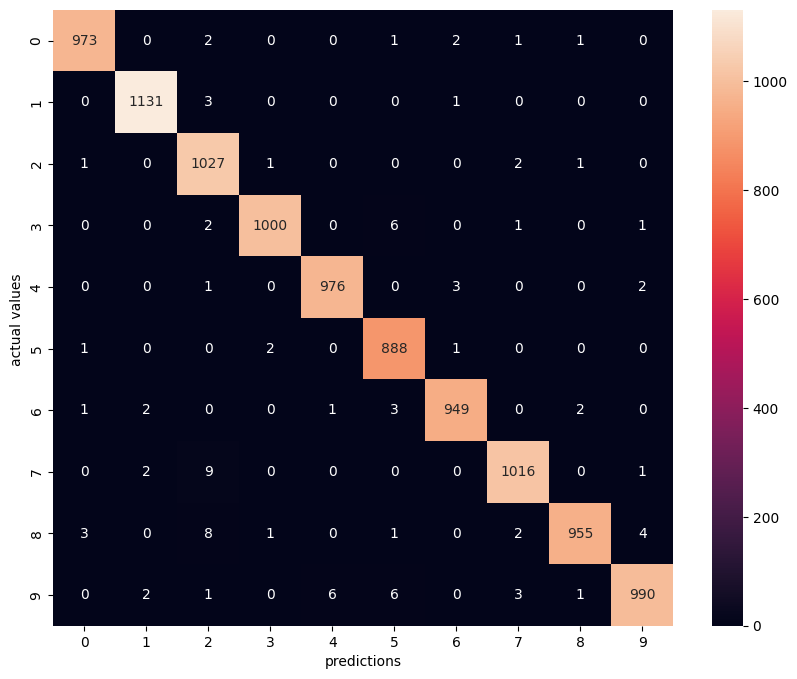

In [43]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_class)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predictions')
plt.ylabel('actual values ')
plt.show()

In [44]:
#project completed :)